### Exam Prep

#### Student Details

<p>
Name : Brian Mutugi Gathiithi<br />
ADM No. : 151174<br />
Course : MSC DSA, Module II<br />
Unit : PDS<br />
</p>

#### Question 1

##### Import the neccesary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

plt.style.use('seaborn')

##### Load the data

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/MutugiBrian/Data-Science-Prac/main/NFL.csv')

df.head()


,Team,Season,Points Scored
0,Baltimore Ravens,2010,357
1,San Francisco 49ers,2010,305
2,Tampa Bay Buccaneers,2010,341
3,New Orleans Saints,2010,384
4,Kansas City Chiefs,2010,366


##### Check for missing values

In [4]:
df.isnull().any()

Team             False
Season           False
Points Scored    False
dtype: bool

<p><i>The data has no missing values</i></p>

##### If missing values were present

In [5]:
df['Season'].fillna(df['Season'].mode(), inplace=True)
df['Points Scored'].fillna(df['Season'].mean(), inplace=True)
df.isnull().sum()

Team             0
Season           0
Points Scored    0
dtype: int64

##### <p>NFL leadership is interested in seeing how the distribution of scoring across the league has changed over these 10 seasons. Construct a single chart that allows the audience to make these comparisons. Provide a thorough discussion of the distribution of scoring in the league over this decade.</p>

<p> Method A: Using a Box Plot </p>

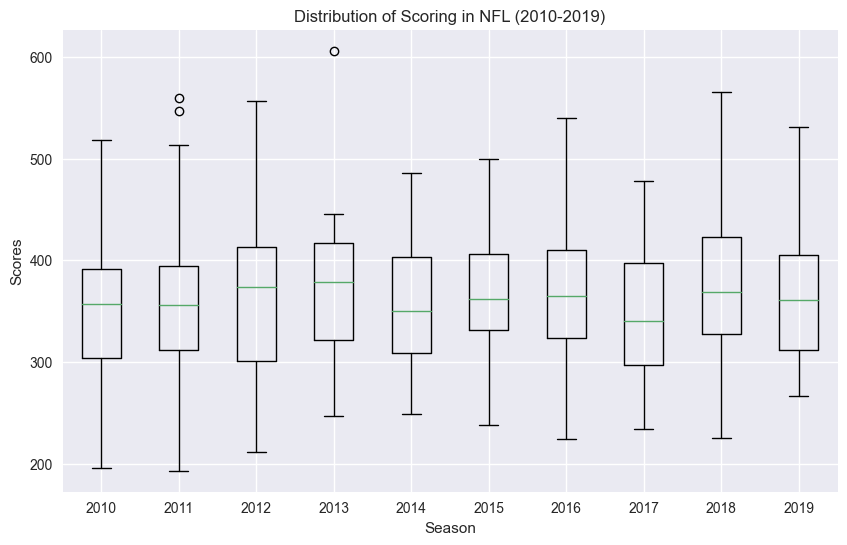

In [6]:
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['Season'] == year]['Points Scored'] for year in range(2010, 2020)])
plt.xticks(range(1, 11), range(2010, 2020))
plt.xlabel('Season')
plt.ylabel('Scores')
plt.title('Distribution of Scoring in NFL (2010-2019)')
plt.show()


<h5>Observation</h5>
<p><i>
The box plot chart shows changes in the median, 25th percentile (Q1), and 75th percentile (Q3) of scores over the 10 seasons in the dataset.

The box plot chart shows that the median score has remained relatively constant over the decade, fluctuating between approximately 340 and 380 points per game. The 25th and 75th percentiles also remained relatively constant, with values ranging between approximately 300 and 420 points per game.

However, we can still see some variations in the distribution of scoring over time. For example, we can see a dip in the median score and the 75th percentile in 2014 and 2017, which may suggest a decrease in high-scoring games that year. We can also see an increase in the median score and the 75th percentile in 2018, which may suggest an increase in high-scoring games that year.

Overall, the box plot provides a clear and concise visualization of the changes in the distribution of scoring across the league over the 10 seasons in the dataset, and allows us to identify some variations in the distribution over time.
</i></p>

##### <p>B) NFL leadership is also interested in the temporal patterns in scoring for individual teams. Unstack the data and use sparklines to show how scoring for each team has changed over these 10 seasons. List a team with a strong upward trend over these 10 seasons. List a team with a strong downward trend over these 10 seasons.</p>

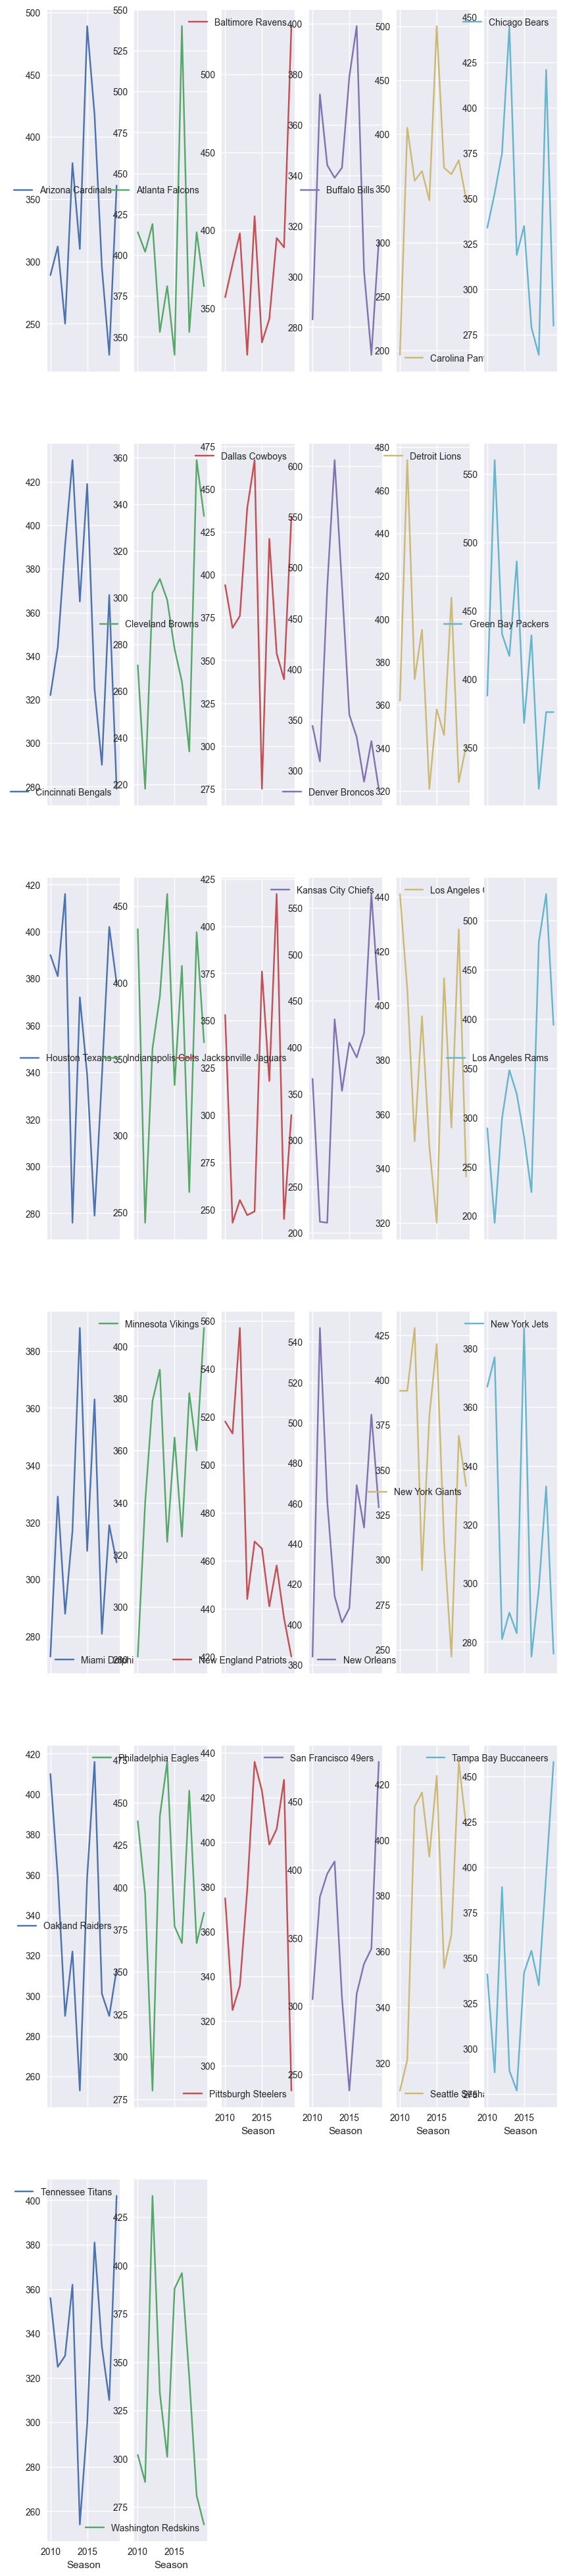

In [7]:
# Pivot the data to create a new dataframe with team names as columns
# and years as index
df_pivot = df.pivot_table(index='Season', columns='Team', values='Points Scored')

# Plot the sparklines for each team
df_pivot.plot(subplots=True, figsize=(10, 50), laIt=(-1, 6))

# Show the plot
plt.show()

<h5>Observation</h5>
<span>Team with a strong upward trend</span>: <i>Baltimore Ravens</i> <br />
<span>Team with a strong downward trend</span>: <i>England Patriots</i>

#### Question 2

##### Load the Umbrella data

In [8]:
udf = pd.read_csv(
    'https://raw.githubusercontent.com/MutugiBrian/Data-Science-Prac/main/Umbrella.csv')

udf = udf.rename(columns={'Sales (Thousands $)': 'Sales'})
## Create a Year.Quarter column

udf["Period"] = udf["Year"].astype(str) + '.'+udf["Quarter"]

udf.head()

,Year,Quarter,Sales,Period
0,1,I,125,1.I
1,1,II,153,1.II
2,1,III,106,1.III
3,1,IV,88,1.IV
4,2,I,118,2.I


##### <p>A) Create a line chart for the sales time series data. Add a four-period moving average to the chart to smooth the data.</p>

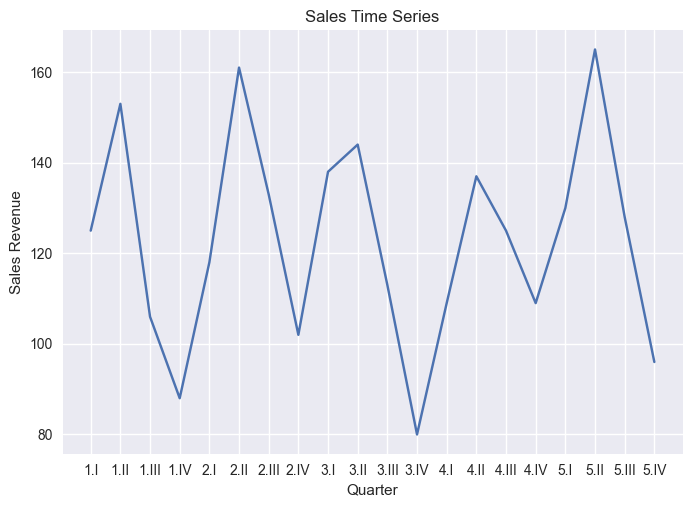

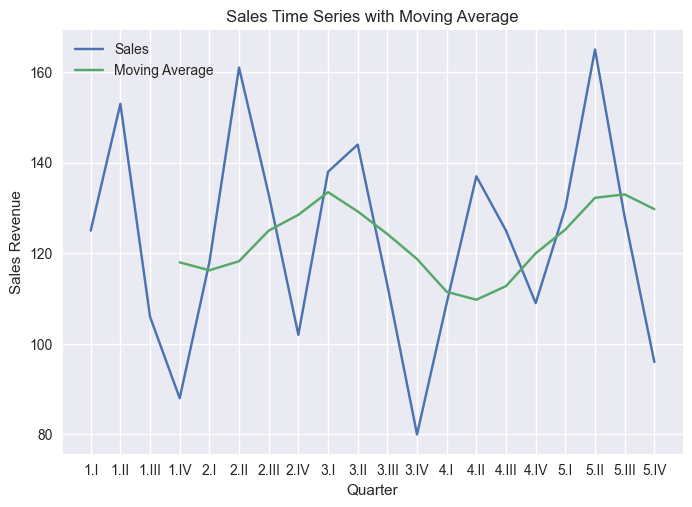

In [9]:
# Plot the sales time series data
plt.plot(udf["Period"],udf['Sales'])
plt.title('Sales Time Series')
plt.xlabel('Quarter')
plt.ylabel('Sales Revenue')
plt.show()

# Add a four-period moving average to the chart
udf['MA'] = udf['Sales'].rolling(window=4).mean()
plt.plot(udf["Period"],udf['Sales'], label='Sales')
plt.plot(udf["Period"],udf['MA'], label='Moving Average')
plt.title('Sales Time Series with Moving Average')
plt.xlabel('Quarter')
plt.ylabel('Sales Revenue')
plt.legend()
plt.show()


##### <p>B) To investigate the possibility of seasonality on a quarterly basis, plot the data as a collection of five data series (one for each year). From this visualization, do I observe any indication of seasonality? If so, describe it.</p>

Plotting the the chart

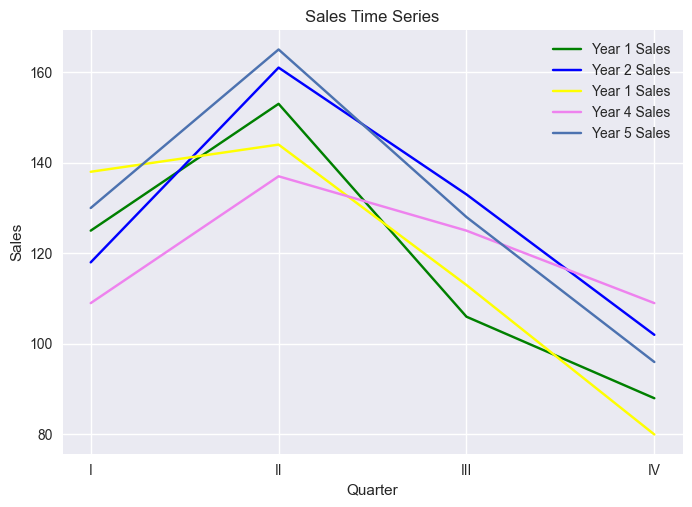

In [10]:
plt.plot(udf.query("Year == 1")['Quarter'], udf.query("Year == 1")[
         'Sales'], label="Year 1 Sales", color='green')
plt.plot(udf.query("Year == 2")['Quarter'], udf.query("Year == 2")[
         'Sales'], label="Year 2 Sales", color='blue')
plt.plot(udf.query("Year == 3")['Quarter'], udf.query("Year == 3")[
         'Sales'], label="Year 1 Sales", color='yellow')
plt.plot(udf.query("Year == 4")['Quarter'], udf.query("Year == 4")[
         'Sales'], label="Year 4 Sales", color='violet')
plt.plot(udf.query("Year == 5")['Quarter'], udf.query("Year == 5")[
         'Sales'], label="Year 5 Sales")
plt.title('Sales Time Series')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.legend()
plt.show()


<h5>Observation</h5>
<i>
From this visualization, we can observe that there is a pattern of seasonality in the data, with higher sales revenue in the first and fourth quarters of each year, and lower sales revenue in the second and third quarters. This pattern is consistent across all five years of data. This suggests that there is indeed a seasonal component to the sales revenue data, with sales being influenced by weather patterns and other seasonal factors. The presence of seasonality in the data could be useful for forecasting future sales revenue and making informed business decisions based on expected seasonal fluctuations.
</i>

#### Question 3 - The file Fortune500Sector contains data on the profits, market capitalizations, and industry sector for a recent sample of firms in the Fortune 500

##### <p>A) Differentiating observations by using a different color for each industry sector, prepare a scatter chart to show the relationship between the variables Market Capitalization and Profit in which Market Capitalization is on the vertical axis and Profit is on the horizontal axis.</p>

Loading the data

In [11]:
mcdf = pd.read_csv(
    'https://raw.githubusercontent.com/MutugiBrian/Data-Science-Prac/main/Fortune500Sector.csv')

mcdf = mcdf.rename(columns={'Profits ($ millions)': 'Profits',
                   'Market Capitalization ($ millions)': 'Market Cap'})
mcdf.head()

,Company,Sector,Profits,Market Cap
0,Alliant Techsystems,Industrials,313.2,1891.9
1,Amazon.com,Consumer,631,81458.6
2,AmerisourceBergen,Healthcare,706.6,10087.6
3,Avis Budget Group,Industrials,-29,1175.8
4,Boeing,Industrials,"4,018.00",55188.8


Clean the Profits column into 'Profit' column

In [12]:
mcdf['Profit'] = mcdf['Profits'].str.replace(
    ',', '').astype(float).astype(int)

Making a scatter chart with different colors for each industry sector using the 'scatter' function of matplotlib

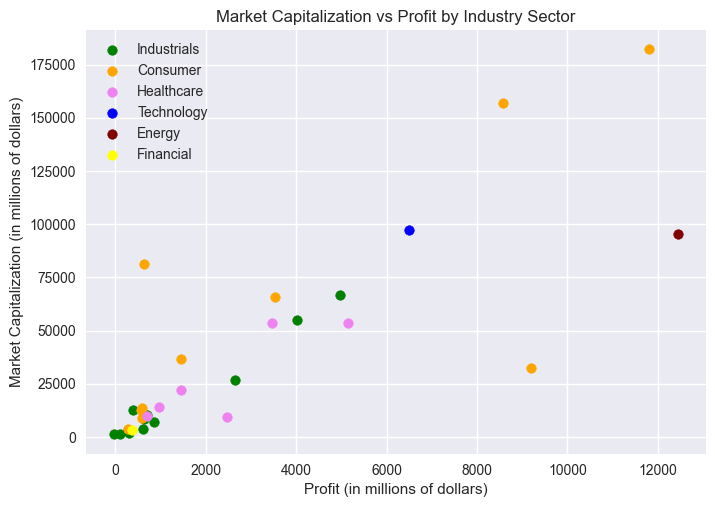

In [13]:
sector_colors = {'Industrials': 'green', 'Financial': 'yellow', 'Technology': 'blue',
                 'Healthcare': 'violet', 'Energy': 'maroon', 'Consumer': 'orange'}

for sector in mcdf["Sector"].unique():
    sector_df = mcdf[mcdf["Sector"] == sector]
    plt.scatter(sector_df["Profit"], sector_df["Market Cap"],
                color=sector_colors[sector], label=sector)

plt.title('Market Capitalization vs Profit by Industry Sector')
plt.xlabel('Profit (in millions of dollars)')
plt.ylabel('Market Capitalization (in millions of dollars)')

plt.legend()
plt.show()


<h5>Observation</h5>
<i>
From this visualization, we can observe that there is a positive relationship between Market Capitalization and Profit, with higher profits generally corresponding to higher market capitalizations. We can also see that different industry sectors occupy different regions of the chart, with some sectors generally having higher market capitalizations and profits than others. For example, the Technology sector (in blue) generally has higher average market capitalizations and average profits than the other sectors - we only see one plot which located on a high scale both on Market Cap and Profit, while the Industrials sector (in light green) generally has lower market capitalizations and profits. The differentiation of the observations by industry sector allows us to gain insights into how different sectors of the economy are performing relative to each other, and can help inform investment decisions and portfolio management strategies.
</i>

##### <p>B) Emphasize the relationship between Market Capitalization and Profit within the healthcare sector by formatting all other sectors with data points in gray with no fill. Create a trendline based only on the observations in the healthcare sector. What does the trendline indicate about this relationship between Market Capitalization and Profit within the healthcare sector?</p>

Plotting

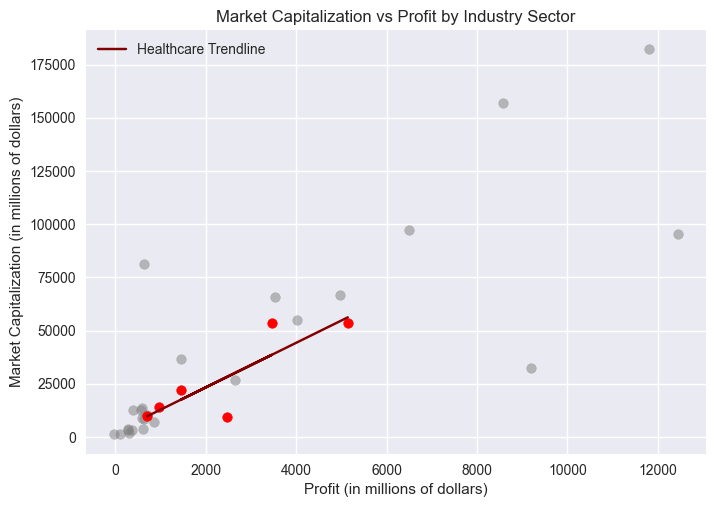

In [14]:
sector_colors = {'Industrials': 'green', 'Financial': 'yellow', 'Technology': 'blue',
                 'Healthcare': 'violet', 'Energy': 'maroon', 'Consumer': 'orange'}

for sector in mcdf["Sector"].unique():
    sector_df = mcdf[mcdf["Sector"] == sector]
    color = sector_colors[sector]
    if sector == "Healthcare":
        color = "red"
        x = sector_df["Profit"]
        y = sector_df["Market Cap"]
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        plt.scatter(sector_df["Profit"], sector_df["Market Cap"],
                    color=color)
        plt.plot(x, p(x), color='maroon', label="Healthcare Trendline")
    else:
        plt.scatter(sector_df["Profit"], sector_df["Market Cap"],
                    color='gray', edgecolors="gray", alpha=0.5)

plt.title('Market Capitalization vs Profit by Industry Sector')
plt.xlabel('Profit (in millions of dollars)')
plt.ylabel('Market Capitalization (in millions of dollars)')

plt.legend()
plt.show()


<h5>Observation</h5>
<i>
From this visualization, the trendline shows a positive slope, indicating that as Profit increases, so does Market Capitalization within the healthcare sector. This suggests that healthcare companies that are more profitable are also valued more highly by the market.
</i>

#### Question 4 - Refer to the EJB data file

##### <p>A) Construct the relative frequency distribution of records over the values of the Category variable. Describe Ir findings.</p>

Load the data

In [28]:

edf = pd.read_csv("https://raw.githubusercontent.com/MutugiBrian/Data-Science-Prac/main/EJB.csv")
edf.head()


,Order ID,Flavor,Category,$ Sales,Date Ordered,Date Delivered,Distribution Center,New Customer?,Service Satisfaction Rating,Product Satisfaction Rating,Unnamed: 10
0,92145,Beet,Juices,605.97,1/1/2018,1/3/2018,ID,Yes,3.0,NaN,NaN
1,92145,Apple,Juices,1549.00,1/1/2018,1/3/2018,ID,Yes,5.0,4.0,NaN
2,92145,Apple,Juices,1986.28,1/1/2018,1/3/2018,ID,Yes,5.0,4.0,NaN
3,92145,Orange,Juices,16.43,1/1/2018,1/3/2018,ID,Yes,5.0,3.0,NaN
4,92145,Cucumber,Juices,1594.93,1/1/2018,1/3/2018,ID,Yes,NaN,NaN,NaN


Relative frequency plot

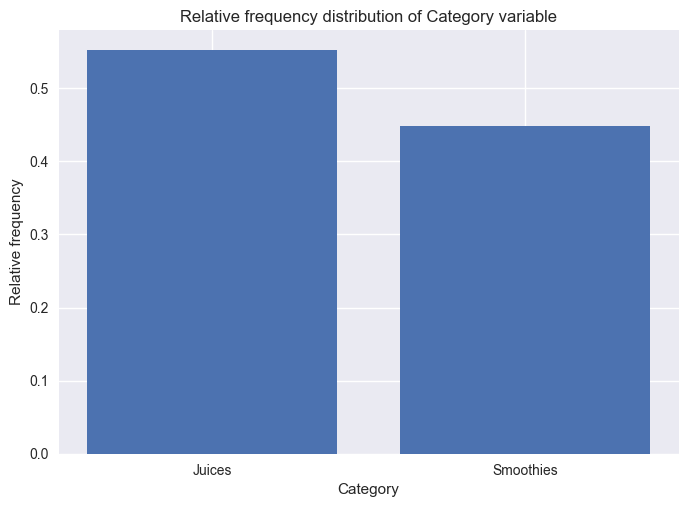

In [29]:
category_counts = edf["Category"].value_counts()
relative_frequencies = category_counts / len(edf)

plt.bar(relative_frequencies.index, relative_frequencies)
plt.title("Relative frequency distribution of Category variable")
plt.xlabel("Category")
plt.ylabel("Relative frequency")
plt.show()


<h5>Observation</h5>
<i>
From this visualization, We can see that the Category variable has two possible values: Juices, and Smoothies. The plot shows that the relative frequency of category Juices is the highest, accounting for approximately 56% of the records, while the relative frequencies of category Smoothies are approximately 44%.
From this analysis, we can conclude that Juices are most common, accounting for the highest relative frequency of records, while Smoothies are slightly less common, accounting for lower relative frequencies of records.
</i>

##### <p>B) Construct the relative frequency distribution of records over the values of the New Customer variable. In the PivotTable, relabel a “No” value for New Customer as “Existing” and a “Yes” value as “New.” Describe Ir findings. </p>

Plotting the data

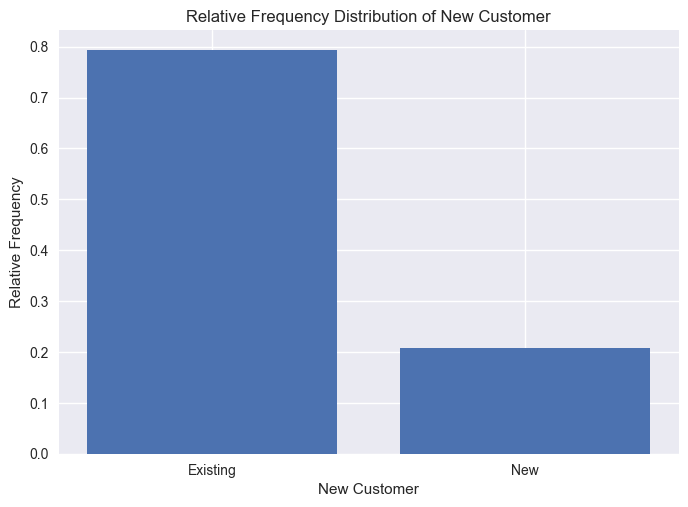

In [30]:
#Remame the columns
edf["New Customer"] = edf["New Customer?"].replace(
    {"No": "Existing", "Yes": "New"})
new_customer_counts = edf["New Customer"].value_counts()
relative_frequencies = new_customer_counts / len(edf)

fig, ax = plt.subplots()
ax.bar(relative_frequencies.index, relative_frequencies.values)
ax.set_xlabel("New Customer")
ax.set_ylabel("Relative Frequency")
ax.set_title("Relative Frequency Distribution of New Customer")

plt.show()


Pivot and relabel the data

In [31]:
pivot_edf = pd.pivot_table(
    edf, values='$ Sales', index='New Customer?', columns='Category', aggfunc='sum')
pivot_edf = pivot_edf.rename(index={"No": "Existing", "Yes": "New"})
pivot_edf

Category,Juices,Smoothies
New Customer?,,
Existing,7820257.10,6368409.23
New,2074633.73,1558599.25


<h5>Observation</h5>
<i>
From the visualizations, We can see that the New Customer variable has two possible values: Existing, and New. The plot shows that the relative frequency of category Existing is the highest, accounting for approximately 79% of the records, while the relative frequencies of category New are approximately 21%.
From this analysis, we can conclude that Existing customers are most common, accounting for the highest relative frequency of records, while New customers are less common, accounting for lower relative frequencies of records.
Additionally, the total Amount of sales are highest for Existing customers, which suggests that the company may have more revenue from their existing customer base than from new customers.
</i>

#### Question 5 - Refer to the EJB data file. To understand the implications of missing data, we must explore the patterns associated with the missing entries for the Product Satisfaction Rating variable in the EJB data used within the chapter. 

##### <p>A) Construct the relative frequency distribution of records over the values of the Product Satisfaction Rating variable. What percentage of records are missing a value of Product Satisfaction Rating?</p>

Relative distribution of Product Satisfaction Rating

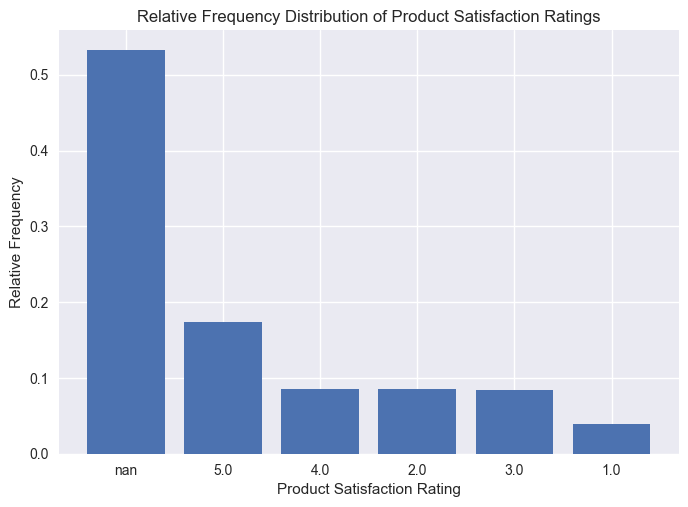

Percentage of Records Missing Product Satisfaction Rating: 53.22%


In [38]:
rating_counts = edf["Product Satisfaction Rating"].value_counts(dropna=False)
rating_counts.index.astype('str')
total_records = len(edf)
# Count the missing values
missing_records = edf["Product Satisfaction Rating"].isnull().sum()

fig, ax = plt.subplots()
ax.bar(rating_counts.index.astype('str'), rating_counts/total_records)
ax.set_xlabel("Product Satisfaction Rating")
ax.set_ylabel("Relative Frequency")
ax.set_title("Relative Frequency Distribution of Product Satisfaction Ratings")

plt.show()

print("Percentage of Records Missing Product Satisfaction Rating: {:.2%}".format(
    missing_records/total_records))



<h5>Observation</h5>
<i>
There is a considerably high percentage of missing ratings, with 53.22% of records missing a value for this variable. This suggests that any analysis or modeling performed on this dataset must take into account the missing data and the potential biases that it may introduce.
</i>

##### <p>B) Considering only records that report values of Product Satisfaction Rating, construct the relative frequency distribution of records over the different flavors. 
</p>

Plotting the relative frequency distribution

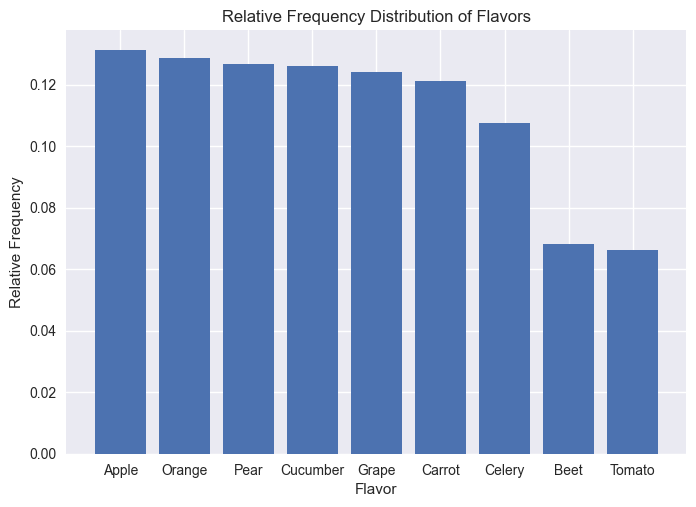

In [40]:
edf_PSR_filtered = edf.dropna(subset=["Product Satisfaction Rating"])

flavor_counts = edf_PSR_filtered["Flavor"].value_counts()
total_records = len(edf_PSR_filtered)

fig, ax = plt.subplots()
ax.bar(flavor_counts.index, flavor_counts/total_records)
ax.set_xlabel("Flavor")
ax.set_ylabel("Relative Frequency")
ax.set_title("Relative Frequency Distribution of Flavors")

plt.show()


<h5>Observation</h5>
<i>
From the visualization, the relative frequency of "Apple flavor is the highest, with approximately 13% of records reporting this flavor. The second most common flavor is "Orange", with around 12.8% of records reporting this flavor. Each of the remaining flavors account for around 7% - 12.5% of records.
</i>

##### <p> C) Considering records that are missing values of Product Satisfaction Rating, construct the relative frequency distribution of records over the different flavors.
</p>

Plotting the relative frequency distribution

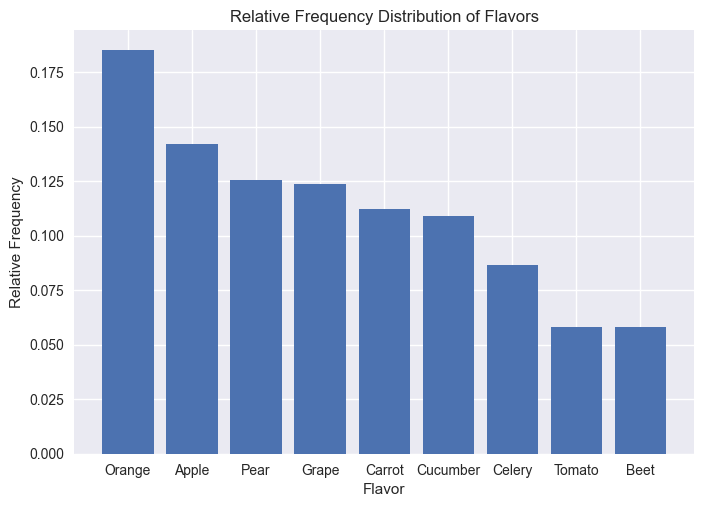

In [41]:
edf_PSR_na_filtered = edf[edf["Product Satisfaction Rating"].isna()]

flavor_counts = edf_PSR_na_filtered["Flavor"].value_counts()
total_records = len(edf_PSR_na_filtered)

fig, ax = plt.subplots()
ax.bar(flavor_counts.index, flavor_counts/total_records)
ax.set_xlabel("Flavor")
ax.set_ylabel("Relative Frequency")
ax.set_title("Relative Frequency Distribution of Flavors")

plt.show()


<h5>Observation</h5>
<i>
From the visualization, the relative frequency of "Orange" flavor is the highest, with approximately 18% of records reporting this flavor. The second most common flavor is "Apple", with around 13% of records reporting this flavor. Each of the remaining flavors account for around 7% - 12.5% of records.
</i>

##### <p> D) Compare the distributions in part (b) and part (c). What does this comparison suggest?
</p>

<i>
These observations suggest that the presence or absence of missing values can significantly affect the relative frequency distribution of records over the different flavors. When records with missing values are removed, the highest relative frequency is for the "Apple" flavor, followed by "Orange". However, when only records with missing values are considered, the highest relative frequency is for the "Orange" flavor, followed by "Apple". This suggests that the missing values are not randomly distributed and may have some relationship with the flavor variable, which could affect the interpretation of any analysis or conclusions drawn from the data. Therefore, it is important to carefully consider the presence of missing values and their potential impact on the analysis.
</i>

#### Question 6 -Refer to the attrition dataset. 

##### <p> A) Reflecting on our course and working on Ir Colab Notebook apply what I learned to this dataset (30 points)
</p>

##### <span> i) Data Cleaning - How would I validate that the data is clean. Include the code to validate this.
</span>

To validate that the data is clean, we can perform the following checks:<br />

Check for missing values in the dataset.<br />
Check for duplicate rows in the dataset.<br />
Check for outliers in numerical variables.<br />

The code itself is as follows:

In [44]:
# Load the data
atdf = pd.read_csv(
    "https://raw.githubusercontent.com/MutugiBrian/Data-Science-Prac/main/Employee-Attrition.csv")

# Check for missing values
print(atdf.isna().sum())


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [47]:
# Check for duplicate rows
print("There are "+str(atdf.duplicated().sum())+" duplicate rows")


There are 0 duplicate rows


In [46]:
# Check for outliers in numerical variables
num_cols = atdf.select_dtypes(include="number").columns
for col in num_cols:
    q1 = atdf[col].quantile(0.25)
    q3 = atdf[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = atdf[(atdf[col] < lower_bound) | (atdf[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")


Age: 0 outliers
DailyRate: 0 outliers
DistanceFromHome: 0 outliers
Education: 0 outliers
EmployeeCount: 0 outliers
EmployeeNumber: 0 outliers
EnvironmentSatisfaction: 0 outliers
HourlyRate: 0 outliers
JobInvolvement: 0 outliers
JobLevel: 0 outliers
JobSatisfaction: 0 outliers
MonthlyIncome: 114 outliers
MonthlyRate: 0 outliers
NumCompaniesWorked: 52 outliers
PercentSalaryHike: 0 outliers
PerformanceRating: 226 outliers
RelationshipSatisfaction: 0 outliers
StandardHours: 0 outliers
StockOptionLevel: 85 outliers
TotalWorkingYears: 63 outliers
TrainingTimesLastYear: 238 outliers
WorkLifeBalance: 0 outliers
YearsAtCompany: 104 outliers
YearsInCurrentRole: 21 outliers
YearsSinceLastPromotion: 107 outliers
YearsWithCurrManager: 14 outliers


If the checks return no issues, then we can consider the data to be clean. If there are concerns in the checks, the following would be done:
<br />
Missing values:<br />
Drop columns with too many missing values using df.dropna(thresh=threshold_value, axis=1) where threshold_value is the minimum number of non-null values required to keep the column.
For numerical data, fill missing values with the median or mean value of the column using df.fillna(df.median()) or df.fillna(df.mean()).
For categorical data, fill missing values with the mode value of the column using df.fillna(df.mode().iloc[0]).
Alternatively, use interpolation techniques like forward fill or backward fill with df.fillna(method='ffill') or df.fillna(method='bfill').
<br />
Duplicate rows:<br />
Remove duplicates using df.drop_duplicates() method. I can also specify which columns to check for duplicates by passing a subset of column names to the method.
<br />
Outliers:<br />
Use statistical techniques like Z-score or Interquartile Range (IQR) to identify and remove outliers. For example, for data points outside a certain number of standard deviations from the mean, use df[(df[col]-df[col].mean())/df[col].std()>threshold] where col is the name of the column and threshold is the number of standard deviations to use as the cutoff point. For IQR, use df[(df[col] > (q3 + 1.5*IQR)) | (df[col] < (q1 - 1.5*IQR))] where q1 and q3 are the first and third quartiles of the data, and IQR is the interquartile range.

##### <span> ii) Data Analysis - 1. How would I explore the data for further analysis? Include code for the EDA
</span>

I would do the following as part of the exploratory data analysis:

Check the first 5 rows of the dataset,
Check the shape of the dataset,
Check the datatypes of each column,
Check the summary statistictics of numerical columns,
Visualize sime columns,

The code itself would be as follows:

In [52]:
# Print the first few rows of the dataset
print(atdf.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [53]:
# Print the shape of the dataset
print(atdf.shape)

(1470, 35)


In [54]:
# Print the data types of each column
print(atdf.dtypes)

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [55]:
# Print summary statistics for the numerical columns
print(atdf.describe())

               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

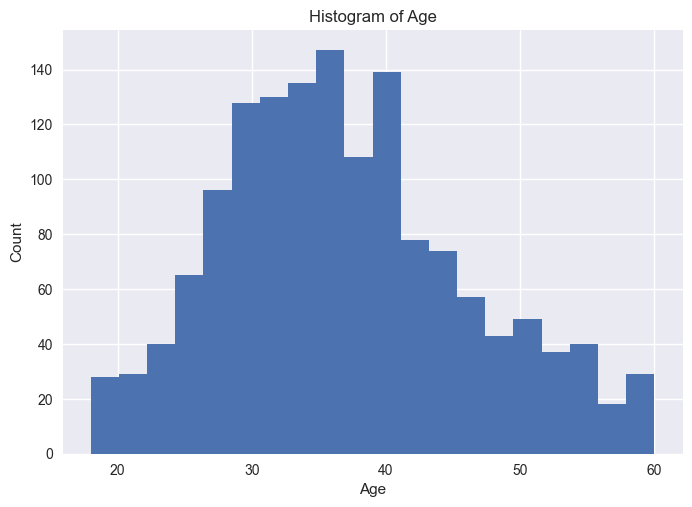

In [59]:
# histogram of age
plt.hist(atdf['Age'], bins=20)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

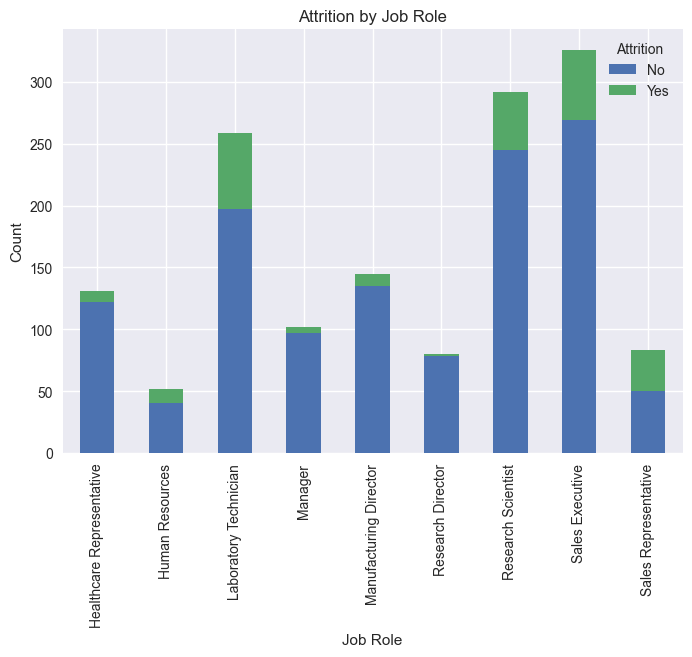

In [61]:
# bar chart of attrition by job role
attrition_by_job_role = atdf.groupby(['JobRole', 'Attrition']).size().unstack()
attrition_by_job_role.plot(kind='bar', stacked=True)
plt.title('Attrition by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.show()

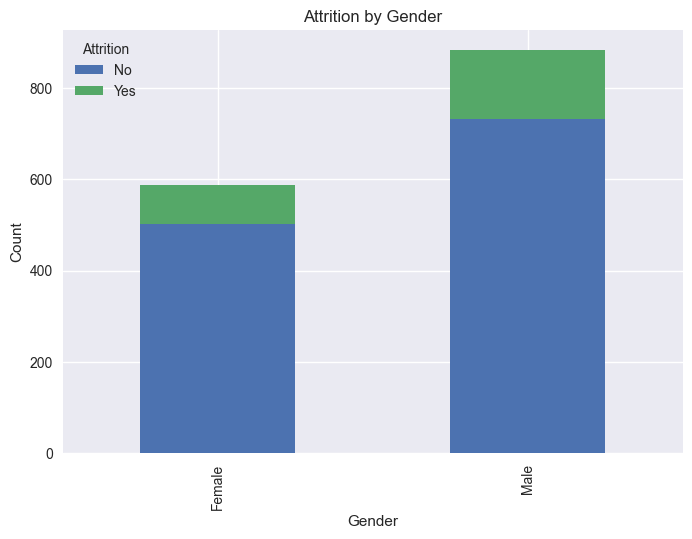

In [66]:
# Group the data by gender and attrition status
gender_attrition = atdf.groupby(['Gender', 'Attrition'])[
    'EmployeeCount'].count()

# Create a pivot table to reshape the data
gender_attrition = gender_attrition.reset_index()
gender_attrition = gender_attrition.pivot(
    index='Gender', columns='Attrition', values='EmployeeCount')

# Create a bar chart
gender_attrition.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Attrition by Gender")

# Show the plot
plt.show()


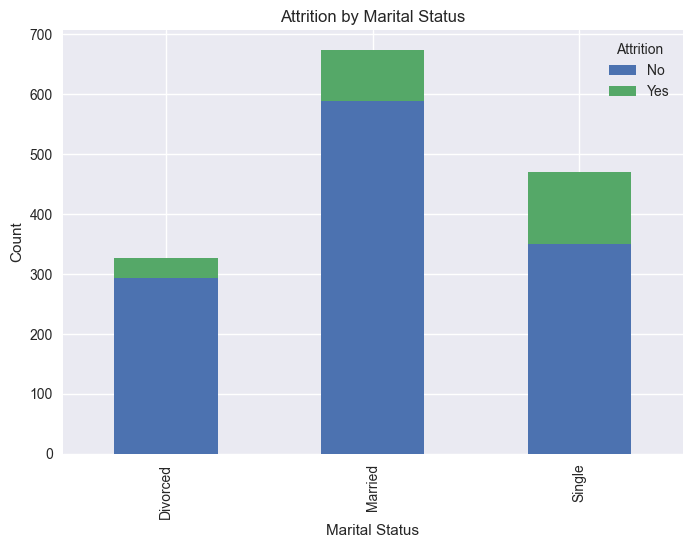

In [67]:
# Group the data by marital status and attrition status
ms_attrition = atdf.groupby(['MaritalStatus', 'Attrition'])[
    'EmployeeCount'].count()

# Create a pivot table to reshape the data
ms_attrition = ms_attrition.reset_index()
ms_attrition = ms_attrition.pivot(
    index='MaritalStatus', columns='Attrition', values='EmployeeCount')

# Create a bar chart
ms_attrition.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.title("Attrition by Marital Status")

# Show the plot
plt.show()


This will lead to basic information about the dataset such as the shape and data types, and some understanding the relationships between different variables in the dataset.

##### <span> ii) Data Analysis - 2. Which visualizations would be most useful for this dataset?
</span>

Bar plot or count plot: A bar plot or count plot can be used to visualize the number of employees who have left the company and those who have stayed. i.e.

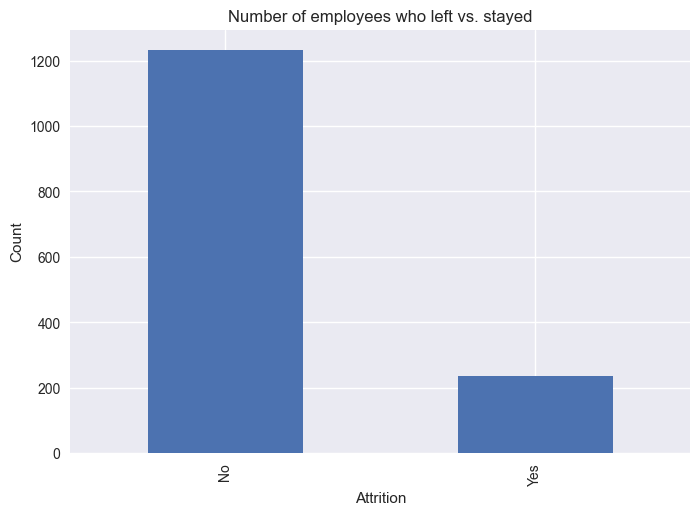

In [68]:
# Plot the number of employees who have left and those who have stayed
atdf['Attrition'].value_counts().plot(kind='bar')
plt.title('Number of employees who left vs. stayed')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()


Bar chart of attrition rates: A bar chart can be used to show the overall attrition rates by gender, job role, education level, and other categorical variables. This can help to identify which groups have the highest rates of attrition and whether there are any patterns or trends. i.e.

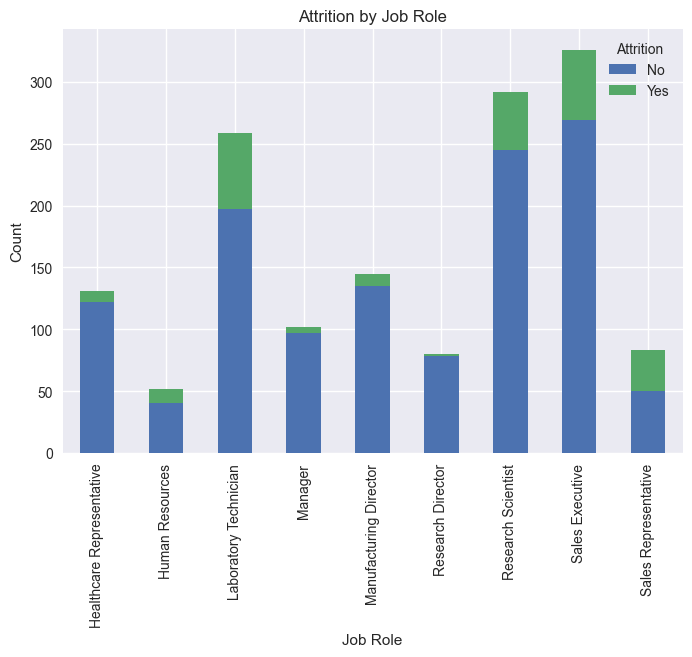

In [70]:
attrition_by_job_role = atdf.groupby(['JobRole', 'Attrition']).size().unstack()
attrition_by_job_role.plot(kind='bar', stacked=True)
plt.title('Attrition by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.show()

Scatter plot of monthly income and job satisfaction: A scatter plot can be used to show the relationship between two continuous variables, such as monthly income and job satisfaction, and can help to identify whether there is a correlation between these variables and attrition.

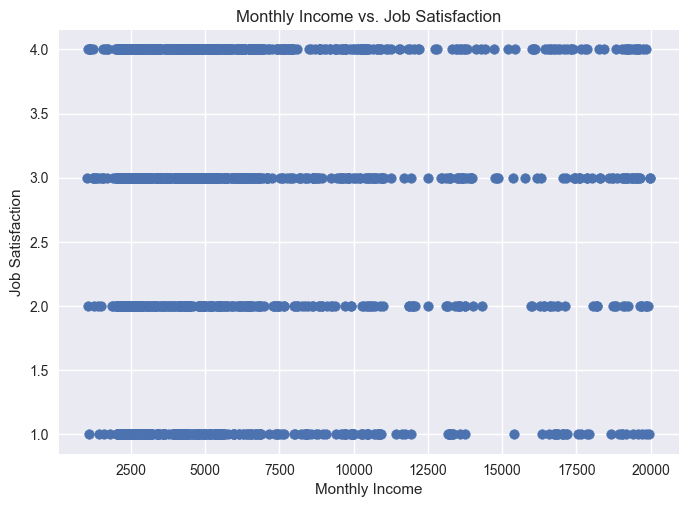

In [72]:
# create a scatter plot of monthly income and job satisfaction
plt.scatter(atdf['MonthlyIncome'], atdf['JobSatisfaction'])
plt.title('Monthly Income vs. Job Satisfaction')
plt.xlabel('Monthly Income')
plt.ylabel('Job Satisfaction')
plt.show()


Pie chart of education level: A pie chart can be used to show the distribution of a categorical variable, such as education level, and can help to identify whether there is a relationship between education and attrition. i.e.

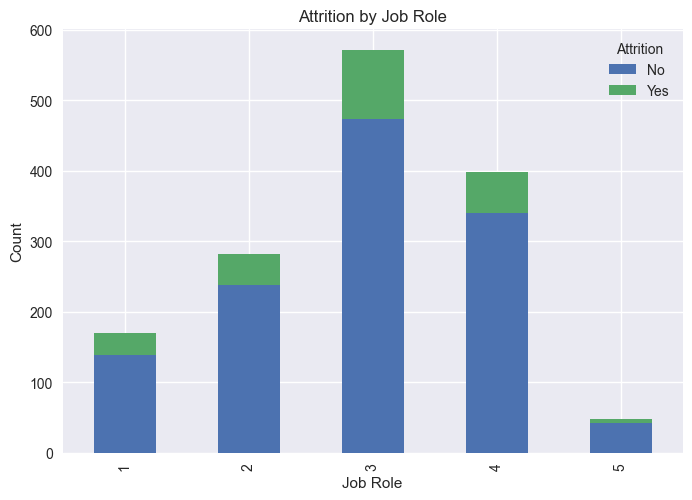

In [74]:
attrition_by_ed = atdf.groupby(['Education', 'Attrition']).size().unstack()
attrition_by_ed.plot(kind='bar', stacked=True)
plt.title('Attrition by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.show()


#### Question 7 - Consider our discussion on data fluency. How could it be valuable to I as a new manager of a Data Science function in a Financial Services company?

Data fluency is the ability to read, analyze, and interpret data to make informed decisions. It involves understanding data structures, statistical methods, and data visualization tools. Data fluency is essential in today's data-driven world, especially for those working in data science and analytics roles.<br />

As a new manager of a Data Science function in a Financial Services company, being data fluent can be extremely valuable for me. Here are ten ways in which data fluency can be beneficial:
<ol>

<li>Improved decision-making: With data fluency, I can make more informed decisions based on insights derived from data analysis.</li>

<li>Increased efficiency: Data fluency can help to identify patterns and trends in data, allowing I to optimize processes and improve efficiency.</li>

<li>Better communication: Being data fluent allows me to effectively communicate data insights to stakeholders, leading to better collaboration and alignment.</li>

<li>Enhanced problem-solving: Data fluency enables me to identify underlying issues and find solutions by analyzing data.</li>

<li>Increased accuracy: Data fluency helps me avoid misinterpreting data or making incorrect conclusions, leading to more accurate outcomes.</li>

<li>Better resource allocation: With data fluency, I can analyze resource utilization and optimize resource allocation for maximum impact.</li>

<li>Improved risk management: Data fluency can help me to identify potential risks and mitigate them before they become a problem.</li>

<li>Increased innovation: Data fluency can spark innovation by identifying opportunities for new products, services, or processes.</li>

<li>Improved customer experience: Data fluency enables me to better understand customer behavior and preferences, leading to an improved customer experience.</li>

<li>Increased competitiveness: Data fluency can help me to gain a competitive advantage by leveraging data to make more informed decisions and optimize processes.</li>
</ol><br />
Being data fluent can be extremely valuable as a new manager of a Data Science function in a Financial Services company. It can lead to improved decision-making, increased efficiency, better communication, enhanced problem-solving, increased accuracy, better resource allocation, improved risk management, increased innovation, improved customer experience, and increased competitiveness.